### Сделайте транспонирование матрицы без использования numpy и других библиотек

In [109]:
def transpose(matrix):
    # Ваш код здесь
    w, h = len(matrix[0]), len(matrix)
    transposed = [[0 for x in range(w)] for y in range(h)]
    for i in range(w):
        for j in range(h):
            transposed[i][j] = matrix[j][i]
    return transposed


def print_matrix(matrix):
    for i in range(len(matrix[0])):
        print(matrix[i])
    
    
matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

print("Matrix:")
print_matrix(matrix)

temp = transpose(matrix)
print("Transposed matrix:")
print_matrix(temp)

Matrix:
[1, 2, 3]
[4, 5, 6]
[7, 8, 9]
Transposed matrix:
[1, 4, 7]
[2, 5, 8]
[3, 6, 9]


In [110]:
import numpy as np

### Теперь сделайте транспонирование с помощью numpy

In [111]:
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

In [112]:
# Ваш код здесь
print(f"Matrix: \n{matrix}")
print(f"Transposed matrix: \n{matrix.T}")

Matrix: 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Transposed matrix: 
[[1 4 7]
 [2 5 8]
 [3 6 9]]


### Сделайте умножение транспонированного input_vector на weights_matrix

In [113]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

input_vector = np.array([[0.5], 
                         [0.8]])

weights_matrix = np.array([[0.2, 0.3], 
                           [0.6, -0.1]])

hidden_layer_output = sigmoid(input_vector.T.dot(weights_matrix))   #Ваш код

print(hidden_layer_output)

[[0.64106741 0.51749286]]



### Используя матричные операции, найдите веса линейной регрессии.

Пусть у вас есть следующие данные:

- $ X $ - матрица признаков размерности $ m \times n $, где $ m $ - количество объектов, а $ n $ - количество признаков.
- $ y $ - вектор ответов размерности $ m \times n $

Веса линейной регрессии $ w $ можно найти по формуле:

$  w = (X^T X)^{-1} X^T y  $ (-1 - это обратная матрица)

Напишите функцию, для нахождения $w$


In [114]:
import numpy as np

def compute_weights(X, y):
    xtx = X.T @ X

    if np.linalg.det(xtx) == 0:
        raise ValueError("Матрица X^T X необратима. Проверьте наличие коллинеарных признаков.")
    # Ваш код здесь
    w = np.linalg.inv(xtx) @ X.T @ y
    return w



In [123]:
X = np.array([
    [1, 2, 3, 6, 5, 6],
    [2, 4, 2, 4, 6, 7],
    [3, 6, 4, 8, 7, 8],
    [4, 8, 3, 6, 8, 9],
    [5, 10, 5, 10, 9, 10],
    [6, 12, 1, 2, 10, 11]
])


y = np.random.rand(6, 1)
weights = compute_weights(X, y)


ValueError: Матрица X^T X необратима. Проверьте наличие коллинеарных признаков.

**Ошибка, так как у матрицы Х есть лин. зависимые столбцы (0 и 1 индексы)**

### В том случае, если у матрицы есть линейно зависимые столбцы посчитать веса не получится

In [116]:
X1 = np.array([
    [1, 2, 3, 4, 5, 6],
    [2, 4, 2, 8, 6, 7],
    [3, 6, 4, 12, 7, 8],
    [4, 8, 3, 16, 8, 9],
    [5, 10, 5, 20, 9, 10],
    [6, 12, 1, 24, 10, 11]
])


y1 = np.random.rand(6, 1)
weights = compute_weights(X1, y1)

ValueError: Матрица X^T X необратима. Проверьте наличие коллинеарных признаков.

### Придумайте способ, который может у любой матрицы X найти линейно зависимые столбцы и напишите такую функцию. После этого примените эту функцию к матрице X1 

**Давайте вопользуемся следующим неравенством**

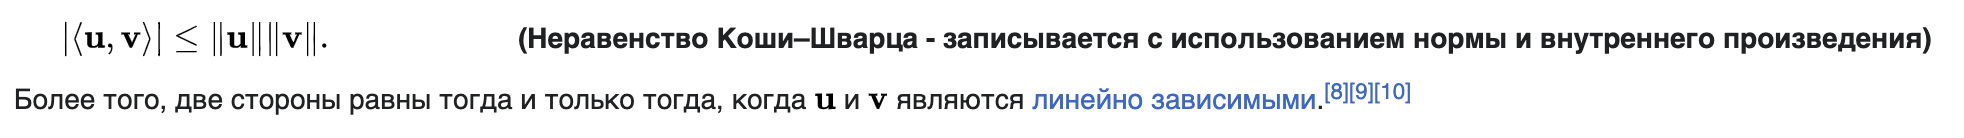

**Мы можем определить линейную зависимость столбцов из условия равенства данного выражения**

In [124]:
#Ваш код здесь

def lin_dep_cols_rows(matrix):
    arr_index_cols, arr_index_rows = [], [] #  Это массивы, в котором будут храниться пары линейно зависимых столбцов и строк
    matrix_r = matrix.T    # Вспомогательная матрица для вычисления индексов линейно зависимых строк
    
    for i in range(matrix.shape[0]):
        for j in range(i+1,matrix.shape[0]):
            inner_product_cols = np.inner(matrix[:,i],matrix[:,j])  # Скалярное произведение i-ого и j-ого стоблцов
            norm_i_cols = np.linalg.norm(matrix[:,i])    # Норма i-ого столбца
            norm_j_cols = np.linalg.norm(matrix[:,j])    # Норма j-ого столбца
            if np.abs(inner_product_cols - norm_j_cols * norm_i_cols) < 1E-8:  # Так как при вычислениях что-то могло неудачно округлиться, то разность выражения при лин.зав. столбцов может быть не равна 0, но близка к нему
                arr_index_cols.append([i,j])                                   # Поэтому условие: разность должна быть меньше малой ошибки эпсилон порядка 10^(-8)
                
    for i in range(matrix_r.shape[0]):
        for j in range(i+1,matrix_r.shape[0]):
            inner_product_rows = np.inner(matrix_r[:,i],matrix_r[:,j])  # Скалярное произведение i-ой и j-ой строки
            norm_i_rows = np.linalg.norm(matrix_r[:,i])    # Норма i-ой строки
            norm_j_rows = np.linalg.norm(matrix_r[:,j])    # Норма j-ой строки
            if np.abs(inner_product_rows - norm_j_rows * norm_i_rows) < 1E-8:  # Так как при вычислениях что-то могло неудачно округлиться, то разность выражения при лин.зав. строк может быть не равна 0, но близка к нему
                arr_index_rows.append([i,j])                                   # Поэтому условие: разность должна быть меньше малой ошибки эпсилон порядка 10^(-8)  
                
    return arr_index_cols, arr_index_rows
                
    
print(f"X1 = \n{X1}")
lin_dep_col, lin_dep_row = lin_dep_cols_rows(X1)
print(f"Indexes of linearly dependent columns: {lin_dep_col}\nIndexes of linearly dependent rows: {lin_dep_row}\n")

print(f"Transposed X1 = \n{X1.T}")
lin_dep_col, lin_dep_row = lin_dep_cols_rows(X1.T)
print(f"Indexes of linearly dependent columns: {lin_dep_col}\nIndexes of linearly dependent rows: {lin_dep_row}")
  
 

X1 = 
[[ 1  2  3  4  5  6]
 [ 2  4  2  8  6  7]
 [ 3  6  4 12  7  8]
 [ 4  8  3 16  8  9]
 [ 5 10  5 20  9 10]
 [ 6 12  1 24 10 11]]
Indexes of linearly dependent columns: [[0, 1], [0, 3], [1, 3]]
Indexes of linearly dependent rows: []

Transposed X1 = 
[[ 1  2  3  4  5  6]
 [ 2  4  6  8 10 12]
 [ 3  2  4  3  5  1]
 [ 4  8 12 16 20 24]
 [ 5  6  7  8  9 10]
 [ 6  7  8  9 10 11]]
Indexes of linearly dependent columns: []
Indexes of linearly dependent rows: [[0, 1], [0, 3], [1, 3]]


**Оказалось, что в матрице Х1 линейно зависимы столбцы с индексами 0, 1 и 3**

К сожалению, данная функция не определяет линейную зависимость столбцов через линейную комбинацию нескольких других столбцов (a_3 = x\*a_1 + y\*a_2, например) 

Ради интереса давайте немного изменим матрицу Х1 так, чтобы у нее больше не было ЛЗ столбцов, и попробуем посчитать для новой матрицы веса линейной регрессии.

In [125]:
X1_new = X1.copy()
X1_new[0][0], X1_new[3][3] = 23, 37

print(f"X1_new: \n{X1_new}\n")
print(f"Проверка ЛНЗ:")
lin_dep_col, lin_dep_row = lin_dep_cols_rows(X1_new)
print(f"Indexes of linearly dependent columns: {lin_dep_col}\nIndexes of linearly dependent rows: {lin_dep_row}\n")

y1 = np.random.rand(6, 1)
print(f"y1 (тот же): \n{y1}\n")
weights = compute_weights(X1_new, y1)
print(f"weights: \n{weights}")

X1_new: 
[[23  2  3  4  5  6]
 [ 2  4  2  8  6  7]
 [ 3  6  4 12  7  8]
 [ 4  8  3 37  8  9]
 [ 5 10  5 20  9 10]
 [ 6 12  1 24 10 11]]

Проверка ЛНЗ:
Indexes of linearly dependent columns: []
Indexes of linearly dependent rows: []

y1 (тот же): 
[[0.45979808]
 [0.29996447]
 [0.64939349]
 [0.87512079]
 [0.95536252]
 [0.94903847]]

weights: 
[[-0.00194427]
 [ 0.03332123]
 [ 0.02450282]
 [ 0.00643978]
 [ 0.02964199]
 [ 0.00729451]]


### Давайте рассмотрим матричное уравнение вида:

### $ AX = B $

### Напишите код, который найдет $X$


In [126]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

#Ваш код
X = np.linalg.inv(A) @ B  
print(f"Матрица X:\n{X}")
print(f"\nПроверка: \nA * X = \n{A @ X}")

Матрица X:
[[-3. -4.]
 [ 4.  5.]]

Проверка: 
A * X = 
[[5. 6.]
 [7. 8.]]


### Напишите код, который находит собственные значения и векторы матрицы A

In [127]:
import numpy as np

A = np.array([[4, -2],
              [1,  3]])

eigenvalues, eigenvectors = np.linalg.eig(A)# Ваш код

print("Собственные значения:")
print(eigenvalues)
print("\nСобственные векторы:")
print(eigenvectors)

Собственные значения:
[3.5+1.32287566j 3.5-1.32287566j]

Собственные векторы:
[[0.81649658+0.j         0.81649658-0.j        ]
 [0.20412415-0.54006172j 0.20412415+0.54006172j]]


### Почему числа получились какие-то странные?

In [121]:
# Ответ тут (можно писать любые мысли)

### Странные = комплексные :)
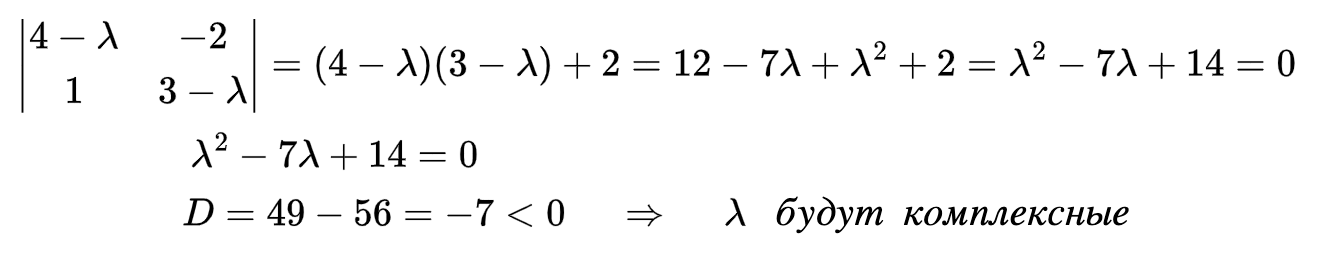